# Final Lab

## Introduction
In this lab we will practice all of the skills we've learned thus far in exploring, selecting, and filtering data in Pandas. We will be using a portion of the [Chicago Crime Dataset](https://www.kaggle.com/currie32/crimes-in-chicago/#Chicago_Crimes_2012_to_2017.csv) (`chicago_crime.csv`). Begin by importing the following libraries and populating a dataframe with the data in the csv file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('chicago_crime.csv')

### EDA

In [3]:
#print the first five rows of the dataframe
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,8692747,HV368620,2012-01-01,090XX S OAKLEY AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,19.0,72.0,26,1162617.0,1844687.0,2012,02/04/2016 06:33:39 AM,41.729470,-87.679883,"(41.729469531, -87.679882632)"
1,8911136,HV584173,2012-01-01,040XX W 26TH ST,1110,DECEPTIVE PRACTICE,BOGUS CHECK,TAVERN/LIQUOR STORE,False,False,...,22.0,30.0,11,1149939.0,1886420.0,2012,02/04/2016 06:33:39 AM,41.844246,-87.725245,"(41.844246118, -87.725244851)"
2,10698879,HZ443128,2012-01-01,007XX S ST LOUIS AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,24.0,27.0,20,NaN,NaN,2012,09/30/2016 03:52:35 PM,NaN,NaN,NaN
3,8812790,HV485714,2012-01-01,022XX S WABASH AVE,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER,False,False,...,2.0,33.0,11,1177098.0,1889498.0,2012,02/04/2016 06:33:39 AM,41.852121,-87.625483,"(41.852121445, -87.625483421)"
4,9239668,HW385707,2012-01-01,081XX S PAULINA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,18.0,71.0,06,1166429.0,1850640.0,2012,02/04/2016 06:33:39 AM,41.745725,-87.665749,"(41.74572518, -87.665749044)"


In [4]:
#print the last five rows of the dataframe
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
49995,10821727,JA122529,2017-01-18,116XX S LOWE AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,34.0,53.0,26,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN
49996,10820573,JA121075,2017-01-18,070XX W WOLFRAM ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,36.0,18.0,14,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN
49997,10820615,JA121073,2017-01-18,013XX S MILLARD AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,24.0,29.0,15,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN
49998,10820562,JA121127,2017-01-18,067XX S GREEN ST,0460,BATTERY,SIMPLE,RESIDENCE,False,False,...,17.0,68.0,08B,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN
49999,10820566,JA121151,2017-01-18,082XX S SOUTH SHORE DR,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,7.0,46.0,14,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN


In [5]:
#print the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
ID                      50000 non-null int64
Case Number             50000 non-null object
Date                    50000 non-null object
Block                   50000 non-null object
IUCR                    50000 non-null object
Primary Type            50000 non-null object
Description             50000 non-null object
Location Description    49948 non-null object
Arrest                  50000 non-null bool
Domestic                50000 non-null bool
Beat                    50000 non-null int64
District                50000 non-null float64
Ward                    50000 non-null float64
Community Area          50000 non-null float64
FBI Code                50000 non-null object
X Coordinate            48731 non-null float64
Y Coordinate            48731 non-null float64
Year                    50000 non-null int64
Updated On              50000 non-null object
Latitude           

Set the column "ID" as the index

In [6]:
df.set_index("ID", inplace=True)

Let's begin by familiarizing ourselves with each of the features. 
Print a statistical summary of all the numerical features in the dataset.

In [7]:
df.describe()

,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,50000.000000,50000.000000,50000.000000,50000.000000,4.873100e+04,4.873100e+04,50000.000000,48731.000000,48731.000000
mean,1150.212340,11.254000,22.836100,37.415560,1.164413e+06,1.885650e+06,2013.894440,41.841822,-87.672188
std,690.085409,6.890105,13.770834,21.411586,1.725573e+04,3.234942e+04,1.450413,0.089017,0.062504
min,111.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,2012.000000,36.619446,-91.686566
25%,613.000000,6.000000,10.000000,23.000000,1.152464e+06,1.858858e+06,2013.000000,41.768137,-87.715726
50%,1024.000000,10.000000,23.000000,32.000000,1.165915e+06,1.891523e+06,2014.000000,41.858071,-87.666406
75%,1711.000000,16.000000,34.000000,56.000000,1.176363e+06,1.908561e+06,2015.000000,41.904861,-87.628082
max,2535.000000,31.000000,50.000000,77.000000,1.204911e+06,1.951503e+06,2017.000000,42.022536,-87.525274


Print the total number of crimes that occurred in each "District"

In [8]:
df.District.value_counts()

11.0    3631
8.0     3375
4.0     2999
6.0     2957
7.0     2880
25.0    2871
3.0     2479
12.0    2428
9.0     2387
10.0    2331
19.0    2270
18.0    2193
15.0    2175
5.0     2165
2.0     2096
1.0     2089
14.0    1760
16.0    1758
22.0    1592
17.0    1407
24.0    1378
20.0     777
31.0       2
Name: District, dtype: int64

The column "Primary Type" contains the name of the crime in each observation.
Print the percentage of each crime type in the dataframe.

In [9]:
df['Primary Type'].value_counts(normalize=True)

THEFT                                0.23100
BATTERY                              0.18226
CRIMINAL DAMAGE                      0.10612
NARCOTICS                            0.09280
ASSAULT                              0.06254
OTHER OFFENSE                        0.05938
BURGLARY                             0.05676
DECEPTIVE PRACTICE                   0.05116
MOTOR VEHICLE THEFT                  0.04220
ROBBERY                              0.03770
CRIMINAL TRESPASS                    0.02412
WEAPONS VIOLATION                    0.01146
PUBLIC PEACE VIOLATION               0.00924
OFFENSE INVOLVING CHILDREN           0.00780
PROSTITUTION                         0.00498
CRIM SEXUAL ASSAULT                  0.00446
INTERFERENCE WITH PUBLIC OFFICER     0.00432
SEX OFFENSE                          0.00320
HOMICIDE                             0.00196
ARSON                                0.00168
GAMBLING                             0.00164
LIQUOR LAW VIOLATION                 0.00120
STALKING  

### Plot

The column "Arrest" is a boolean representing whether or not the crime led to an arrest.
Plot a histogram of the "Arrest" column.

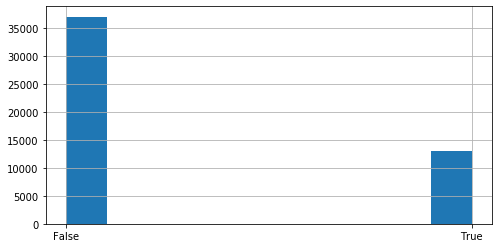

In [10]:
#matplotlib will raise an error if you plot a histogram of a boolean value, so convert to string first
df['Arrest'] = df['Arrest'].apply(lambda x: str(x))
plt.figure(figsize=(8,4))
df['Arrest'].hist();

The column "Domestic" is a boolean representing whether or not the crime was domestic-related. Plot a histograme of the "Domestic" column.

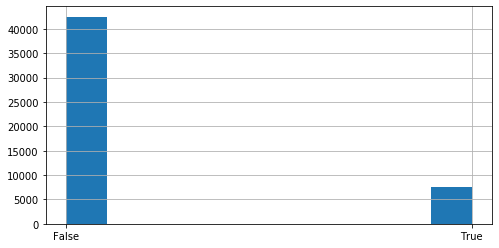

In [11]:
#matplotlib will raise an error if you plot a histogram of a boolean value, so convert to string first
df['Domestic'] = df['Domestic'].apply(lambda x: str(x))
plt.figure(figsize=(8,4))
df['Domestic'].hist();

Plot a hisrogram with the counts of crimes in each "Ward"

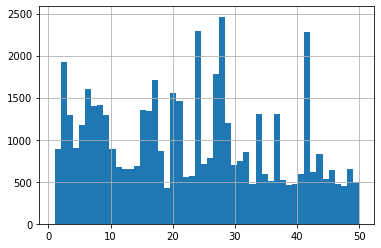

In [12]:
df['Ward'].hist(bins=len(df.Ward.unique()));

Plot a hisrogram with the counts of crimes in each "Community Area"

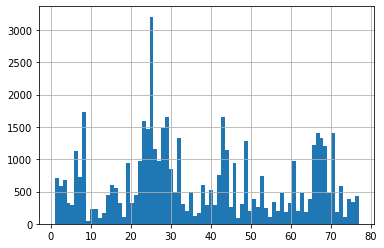

In [13]:
df['Community Area'].hist(bins=len(df['Community Area'].unique()));

Plot a hisrogram with the counts of crimes in each year.

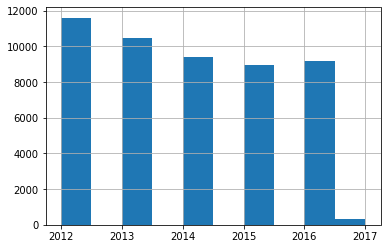

In [14]:
df.Year.hist();

What percentage of crimes was in each type of location ("Location Description")

In [15]:
df['Location Description'].value_counts(normalize=True)

STREET                       0.224353
RESIDENCE                    0.160447
APARTMENT                    0.126732
SIDEWALK                     0.109994
OTHER                        0.037219
                               ...   
HOSPITAL                     0.000020
COIN OPERATED MACHINE        0.000020
CEMETARY                     0.000020
SAVINGS AND LOAN             0.000020
CTA TRACKS - RIGHT OF WAY    0.000020
Name: Location Description, Length: 106, dtype: float64

Plot a histogram of the number of crimes in the top five location types from above

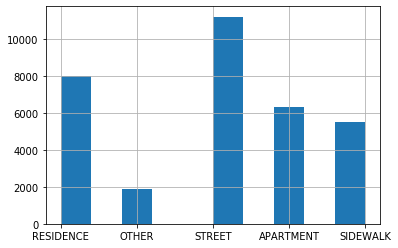

In [16]:
top_5 = ['STREET', "RESIDENCE", "APARTMENT", "SIDEWALK", "OTHER"]
df[df['Location Description'].isin(top_5)]['Location Description'].hist()

### Select
In the cells below, use `iloc` and `loc` to select the requested data.

Select rows 15 through 20, including all columns

In [17]:
df.iloc[15:20]

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
8430568,HV109011,2012-01-01,056XX S HONORE ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,715,...,15.0,67.0,07,1164979.0,1867377.0,2012,02/04/2016 06:33:39 AM,41.791685,-87.670590,"(41.791684521, -87.670589582)"
8421741,HV100404,2012-01-01,025XX N MILWAUKEE AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1414,...,35.0,22.0,08B,1155378.0,1916716.0,2012,02/04/2016 06:33:39 AM,41.927274,-87.704470,"(41.927273891, -87.704469775)"
8504511,HV102241,2012-01-01,014XX W 69TH ST,0810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,False,725,...,17.0,67.0,06,1167725.0,1858985.0,2012,02/04/2016 06:33:39 AM,41.768597,-87.660761,"(41.7685973, -87.660761186)"
8421550,HV100226,2012-01-01,026XX W PETERSON AVE,0460,BATTERY,SIMPLE,RESTAURANT,True,False,2413,...,50.0,2.0,08B,1157739.0,1939763.0,2012,02/04/2016 06:33:39 AM,41.990468,-87.695163,"(41.990468345, -87.695163359)"
8421502,HV100228,2012-01-01,033XX N CLARK ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1924,...,44.0,6.0,14,1169535.0,1922172.0,2012,02/04/2016 06:33:39 AM,41.941949,-87.652290,"(41.941948705, -87.652289585)"


Select all columns after "Arrest", include all rows

In [18]:
df.loc[:, "Arrest":]

,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,
8692747,False,False,2221,22.0,19.0,72.0,26,1162617.0,1844687.0,2012,02/04/2016 06:33:39 AM,41.729470,-87.679883,"(41.729469531, -87.679882632)"
8911136,False,False,1031,10.0,22.0,30.0,11,1149939.0,1886420.0,2012,02/04/2016 06:33:39 AM,41.844246,-87.725245,"(41.844246118, -87.725244851)"
10698879,False,False,1133,11.0,24.0,27.0,20,NaN,NaN,2012,09/30/2016 03:52:35 PM,NaN,NaN,NaN
8812790,False,False,131,1.0,2.0,33.0,11,1177098.0,1889498.0,2012,02/04/2016 06:33:39 AM,41.852121,-87.625483,"(41.852121445, -87.625483421)"
9239668,False,False,614,6.0,18.0,71.0,06,1166429.0,1850640.0,2012,02/04/2016 06:33:39 AM,41.745725,-87.665749,"(41.74572518, -87.665749044)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821727,False,True,524,5.0,34.0,53.0,26,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN
10820573,False,False,2511,25.0,36.0,18.0,14,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN
10820615,True,False,1011,10.0,24.0,29.0,15,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN


Select the row with case id 9239668 and include the columns "Beat", "District" and "Ward"

In [19]:
df.loc[9239668, "Beat":"Ward"]

Beat        614
District      6
Ward         18
Name: 9239668, dtype: object

Select case id 8421741 and 8421550, with columns "Arrest" and "Location"

In [20]:
df.loc[[8421550, 8421741], ["Arrest", "Location"]]

,Arrest,Location
ID,,
8421550,True,"(41.990468345, -87.695163359)"
8421741,False,"(41.927273891, -87.704469775)"
8421741,False,"(41.927273891, -87.704469775)"


Select the last 5 rows and the last 5 columns

In [21]:
df.iloc[-5:, -5:]

,Year,Updated On,Latitude,Longitude,Location
ID,,,,,
10821727,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN
10820573,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN
10820615,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN
10820562,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN
10820566,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN


Select every 500th row and every 3rd column

In [22]:
df.iloc[::500, ::3]

,Case Number,IUCR,Location Description,Beat,Community Area,Y Coordinate,Latitude
ID,,,,,,,
8692747,HV368620,2825,RESIDENCE,2221,72.0,1844687.0,41.729470
8444601,HV122524,0470,"SCHOOL, PUBLIC, BUILDING",1731,16.0,1923676.0,41.946542
8499037,HV145043,0486,APARTMENT,612,71.0,1852151.0,41.749780
8491556,HV168698,1350,CHA PARKING LOT/GROUNDS,1823,8.0,1906751.0,41.899568
8515807,HV193079,0860,GROCERY FOOD STORE,1132,26.0,1897607.0,41.874947
...,...,...,...,...,...,...,...
10705259,HZ461573,143A,STREET,713,67.0,1863303.0,41.780439
10728206,HZ487270,0810,RESIDENTIAL YARD (FRONT/BACK),232,40.0,1866304.0,41.788451
10750801,HZ513112,0820,APARTMENT,212,36.0,1879698.0,41.825104


### Filter
Use `.filter` to answer the questions below.

First reset the index. (There are duplicate case IDs in the index, and `filter` does not work on indices that have duplicates)

In [23]:
df.reset_index(inplace=True)

Select the rows with index 3, 10, and 50

In [24]:
df.filter(items=[3,10, 50], axis=0)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
3,8812790,HV485714,2012-01-01,022XX S WABASH AVE,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER,False,False,...,2.0,33.0,11,1177098.0,1889498.0,2012,02/04/2016 06:33:39 AM,41.852121,-87.625483,"(41.852121445, -87.625483421)"
10,8421529,HV100079,2012-01-01,033XX N HALSTED ST,0460,BATTERY,SIMPLE,BAR OR TAVERN,False,False,...,44.0,6.0,08B,1170328.0,1922596.0,2012,02/04/2016 06:33:39 AM,41.943095,-87.649363,"(41.943094852, -87.649362556)"
50,8422543,HV101307,2012-01-02,006XX N LATROBE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,...,28.0,25.0,08B,1141248.0,1903717.0,2012,02/04/2016 06:33:39 AM,41.891876,-87.756713,"(41.89187581, -87.756713352)"


Select the columns "Date", "Ward" and "Year"

In [25]:
df.filter(items=['Date', 'Ward', 'Year'])

,Date,Ward,Year
0,2012-01-01,19.0,2012
1,2012-01-01,22.0,2012
2,2012-01-01,24.0,2012
3,2012-01-01,2.0,2012
4,2012-01-01,18.0,2012
...,...,...,...
49995,2017-01-18,34.0,2017
49996,2017-01-18,36.0,2017
49997,2017-01-18,24.0,2017
49998,2017-01-18,17.0,2017


Select the columns that include the word "Description"

In [26]:
df.filter(like="Description")

,Description,Location Description
0,HARASSMENT BY TELEPHONE,RESIDENCE
1,BOGUS CHECK,TAVERN/LIQUOR STORE
2,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE
3,CREDIT CARD FRAUD,OTHER
4,FINANCIAL ID THEFT: OVER $300,RESIDENCE
...,...,...
49995,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE
49996,TO PROPERTY,RESIDENCE
49997,UNLAWFUL POSS OF HANDGUN,STREET
49998,SIMPLE,RESIDENCE


Select all columns that start with the letter "L"

In [27]:
df.filter(like="L")

,Location Description,Latitude,Longitude,Location
0,RESIDENCE,41.729470,-87.679883,"(41.729469531, -87.679882632)"
1,TAVERN/LIQUOR STORE,41.844246,-87.725245,"(41.844246118, -87.725244851)"
2,RESIDENCE,NaN,NaN,NaN
3,OTHER,41.852121,-87.625483,"(41.852121445, -87.625483421)"
4,RESIDENCE,41.745725,-87.665749,"(41.74572518, -87.665749044)"
...,...,...,...,...
49995,RESIDENCE,NaN,NaN,NaN
49996,RESIDENCE,NaN,NaN,NaN
49997,STREET,NaN,NaN,NaN
49998,RESIDENCE,NaN,NaN,NaN


Set the "Date" column as the index and then select rows that occurred in 2015

In [28]:
df.set_index("Date").filter(like='2015', axis=0)

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,10146787,HY335775,030XX S AVERS AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,True,1031,...,22.0,30.0,20,1151192.0,1884044.0,2015,08/17/2015 03:03:40 PM,41.837702,-87.720709,"(41.837701634, -87.720708714)"
2015-01-01,10274300,HY462262,018XX N CALIFORNIA AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1421,...,1.0,22.0,11,1157416.0,1912047.0,2015,04/15/2016 03:49:27 PM,41.914421,-87.697108,"(41.914420537, -87.697108234)"
2015-01-01,10064865,HY253447,081XX S LA SALLE ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,"SCHOOL, PUBLIC, BUILDING",False,False,622,...,21.0,44.0,11,1176689.0,1851107.0,2015,08/17/2015 03:03:40 PM,41.746782,-87.628141,"(41.746782102, -87.628140521)"
2015-01-01,9913795,HY102785,043XX W CULLERTON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1012,...,24.0,29.0,11,1147811.0,1890068.0,2015,08/17/2015 03:03:40 PM,41.854298,-87.732961,"(41.854297783, -87.732960725)"
2015-01-01,9911071,HY100039,038XX W CERMAK RD,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,1013,...,22.0,30.0,14,1150931.0,1889103.0,2015,08/17/2015 03:03:40 PM,41.851589,-87.721534,"(41.851589272, -87.721534206)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31,10364983,HZ100133,051XX S PAULINA ST,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,932,...,16.0,61.0,05,1165882.0,1870538.0,2015,01/07/2016 04:14:34 PM,41.800340,-87.667189,"(41.800339536, -87.667188625)"
2015-12-31,10365723,HZ101513,026XX S WHIPPLE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,...,12.0,30.0,14,1156450.0,1886434.0,2015,01/07/2016 04:14:34 PM,41.844156,-87.701350,"(41.844155545, -87.701350092)"
2015-12-31,10364666,HY556542,003XX W 80TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,623,...,17.0,44.0,08B,1175228.0,1851893.0,2015,01/07/2016 04:14:34 PM,41.748972,-87.633471,"(41.748971716, -87.633470544)"


Set "Location Description" as the index and then select all rows that occured in an "APARTMENT"

Hint: Use `like=` instead of `items=` since there will now be duplicates in the index

In [29]:
df.set_index("Location Description").filter(like='APARTMENT', axis=0)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Location Description,,,,,,,,,,,,,,,,,,,,,
APARTMENT,8422159,HV100882,2012-01-01,032XX W 62ND PL,0460,BATTERY,SIMPLE,False,False,823,...,15.0,66.0,08B,1155909.0,1863008.0,2012,02/04/2016 06:33:39 AM,41.779882,-87.703965,"(41.779882406, -87.70396508)"
APARTMENT,8429588,HT653967,2012-01-01,071XX S CARPENTER ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,733,...,17.0,68.0,08B,1170551.0,1857382.0,2012,02/04/2016 06:33:39 AM,41.764137,-87.650449,"(41.764137359, -87.650449151)"
APARTMENT,8421534,HV100290,2012-01-01,037XX W BELMONT AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,False,False,2523,...,30.0,21.0,14,1150677.0,1921014.0,2012,02/04/2016 06:33:39 AM,41.939161,-87.721631,"(41.939161273, -87.721631428)"
APARTMENT,8421636,HV100322,2012-01-01,039XX W FILLMORE ST,1310,CRIMINAL DAMAGE,TO PROPERTY,False,True,1132,...,24.0,29.0,14,1150317.0,1895083.0,2012,02/04/2016 06:33:39 AM,41.868011,-87.723632,"(41.868011091, -87.723631896)"
APARTMENT,8421848,HV100423,2012-01-01,085XX S BURNHAM AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,423,...,7.0,46.0,08B,1196307.0,1848818.0,2012,02/04/2016 06:33:39 AM,41.740037,-87.556332,"(41.740037223, -87.55633216)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
APARTMENT,10818842,JA119167,2017-01-17,072XX S CONSTANCE AVE,0820,THEFT,$500 AND UNDER,True,True,324,...,5.0,43.0,06,NaN,NaN,2017,01/24/2017 03:55:11 PM,NaN,NaN,NaN
APARTMENT,10823331,JA124054,2017-01-17,076XX W FOREST PRESERVE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,False,False,1631,...,36.0,17.0,08B,NaN,NaN,2017,01/24/2017 03:55:11 PM,NaN,NaN,NaN
APARTMENT,10819430,JA119989,2017-01-18,075XX S CARPENTER ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,612,...,17.0,71.0,08B,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN


Set the "Case Number" as the index, and then select all rows that have a case number beginning with "HZ519"

In [30]:
df.set_index("Case Number").filter(like="HZ519", axis=0)

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Case Number,,,,,,,,,,,,,,,,,,,,,
HZ519257,10758376,2014-11-01,034XX W FULLERTON AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,False,1413,...,26.0,22.0,26,NaN,NaN,2014,11/20/2016 03:47:20 PM,NaN,NaN,NaN
HZ519349,10756587,2016-10-20,044XX N HARDING AVE,0820,THEFT,$500 AND UNDER,RESIDENCE-GARAGE,False,False,1723,...,39.0,14.0,06,NaN,NaN,2016,11/18/2016 03:49:39 PM,NaN,NaN,NaN
HZ519552,10756671,2016-11-10,011XX N LECLAIRE AVE,1365,CRIMINAL TRESPASS,TO RESIDENCE,RESIDENCE,False,False,1531,...,37.0,25.0,26,1142154.0,1907121.0,2016,11/21/2016 03:49:31 PM,41.901200,-87.753301,"(41.901200028, -87.753301455)"
HZ519574,10757736,2016-11-14,011XX W 18TH ST,0820,THEFT,$500 AND UNDER,STREET,False,False,1235,...,25.0,31.0,06,1168914.0,1891563.0,2016,11/21/2016 03:51:50 PM,41.857969,-87.655461,"(41.857969178, -87.655460942)"
HZ519159,10756569,2016-11-17,021XX S PAULINA ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE-GARAGE,False,False,1234,...,25.0,31.0,14,1165363.0,1890033.0,2016,11/24/2016 03:48:31 PM,41.853847,-87.668539,"(41.853846909, -87.668538729)"
HZ519154,10756427,2016-11-17,028XX S PRINCETON AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,914,...,11.0,34.0,06,1174751.0,1885861.0,2016,11/24/2016 03:48:31 PM,41.842194,-87.634206,"(41.842194004, -87.634206149)"
HZ519429,10756645,2016-11-17,042XX W AUGUSTA BLVD,0930,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,SIDEWALK,True,False,1111,...,37.0,23.0,07,1147881.0,1906329.0,2016,11/24/2016 03:48:31 PM,41.898919,-87.732286,"(41.898918515, -87.732285832)"
HZ519469,10756530,2016-11-17,046XX S HALSTED ST,1121,DECEPTIVE PRACTICE,COUNTERFEITING DOCUMENT,GROCERY FOOD STORE,False,False,925,...,11.0,61.0,10,1171750.0,1874054.0,2016,11/24/2016 03:48:31 PM,41.809861,-87.645566,"(41.809860998, -87.645565723)"
HZ519695,10756806,2016-11-17,095XX S JEFFERY AVE,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,False,431,...,7.0,51.0,06,1191180.0,1842054.0,2016,11/24/2016 03:48:31 PM,41.721602,-87.575335,"(41.721601646, -87.575334716)"


Set "Description" as the index and then select all rows that contain the word "FRAUD"

In [31]:
df.set_index("Description").filter(like="FRAUD", axis=0)

,ID,Case Number,Date,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Description,,,,,,,,,,,,,,,,,,,,,
CREDIT CARD FRAUD,8812790,HV485714,2012-01-01,022XX S WABASH AVE,1150,DECEPTIVE PRACTICE,OTHER,False,False,131,...,2.0,33.0,11,1177098.0,1889498.0,2012,02/04/2016 06:33:39 AM,41.852121,-87.625483,"(41.852121445, -87.625483421)"
FRAUD OR CONFIDENCE GAME,8427448,HV105796,2012-01-05,044XX N NARRAGANSETT AVE,1130,DECEPTIVE PRACTICE,RESIDENCE,False,False,1622,...,38.0,15.0,11,1132888.0,1928856.0,2012,02/04/2016 06:33:39 AM,41.961010,-87.786828,"(41.96101027, -87.786828016)"
CREDIT CARD FRAUD,8434000,HV112085,2012-01-08,001XX W HUBBARD ST,1150,DECEPTIVE PRACTICE,BAR OR TAVERN,False,False,1831,...,42.0,8.0,11,1175290.0,1903292.0,2012,02/04/2016 06:33:39 AM,41.890014,-87.631705,"(41.890013771, -87.631705393)"
FRAUD OR CONFIDENCE GAME,8445209,HV123057,2012-01-11,016XX N KEDVALE AVE,1130,DECEPTIVE PRACTICE,APARTMENT,False,False,2534,...,30.0,23.0,11,1148467.0,1910634.0,2012,02/04/2016 06:33:39 AM,41.910721,-87.730022,"(41.910720587, -87.73002225)"
CREDIT CARD FRAUD,8441951,HV120086,2012-01-15,016XX N LINDER AVE,1150,DECEPTIVE PRACTICE,SIDEWALK,False,False,2532,...,37.0,25.0,11,1139484.0,1910431.0,2012,02/04/2016 06:33:39 AM,41.910332,-87.763028,"(41.910332176, -87.763027914)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CREDIT CARD FRAUD,10800880,HZ571613,2016-12-31,017XX N MARCEY ST,1150,DECEPTIVE PRACTICE,TAVERN/LIQUOR STORE,False,False,1811,...,32.0,7.0,11,1168889.0,1911829.0,2016,01/07/2017 03:56:13 PM,41.913581,-87.654965,"(41.913581053, -87.654964655)"
CREDIT CARD FRAUD,10802566,JA101843,2017-01-01,001XX W ILLINOIS ST,1150,DECEPTIVE PRACTICE,SIDEWALK,False,False,1831,...,42.0,8.0,11,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
CREDIT CARD FRAUD,10801785,JA100870,2017-01-01,0000X E DELAWARE PL,1150,DECEPTIVE PRACTICE,APARTMENT,False,False,1833,...,42.0,8.0,11,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN


Use filter to select the "Community Area" and "Beat" columns, and then plot a histograms of both columns.

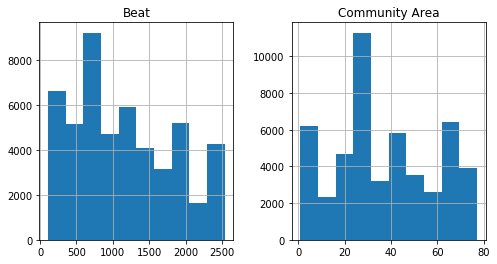

In [32]:
df.filter(items=["Community Area", "Beat"], axis=1).hist(figsize=(8,4));

## Conclusion
Pandas provides us with numerous ways to explore, select, and filter the data that we actually want to see. In this lab we used some of the most common ways of pulling the data we need, including `iloc`, `loc`, and `.filter`. 